# Chapter 20 - Learning Probabilistic Models

*In which we view learning as a form of uncertain reasoning from observations, and devise
models to represent the uncertain world.* - Russell and Norvig

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch20_learning_probabilistic_models/DALL%C2%B7E%202024-03-17%2013.00.31%20-%20In%20a%20playful%20and%20vibrant%20scene%2C%20a%20cheerful%20clown%20is%20handing%20out%20candies%20to%20excited%20children.%20The%20candies%20all%20have%20the%20same%20shiny%2C%20silver%20outer%20wrapper.webp" width="400">

## Sample Problem - Unmarked Candy

We have a bag of candies, some of which are cherry flavored and some of which are lime flavored. We don't know the proportion of each flavor. We do know that the manufacturer has five different types of bags, each with a different proportion of cherry and lime candies.

Here h1 to h5 are the types of bags that contain different proportions of cherry and lime candies. We want to know the probability of each bag given the observation that the candy was cherry flavored.

Our goal is to find which bag it is. We can use the Bayes' theorem to solve this problem. As more candy is eaten, the probability of each bag will change.

* h1: 100% cherry,
* h2: 75% cherry + 25% lime,
* h3: 50% cherry + 50% lime,
* h4: 25% cherry + 75% lime,
* h5: 100% lime.

Optionally we might have the information that manufacturers has the following distribution of bags:
[0.1, 0.2, 0.4, 0.2, 0.1] respectively for h1 to h5.
So those would be your starting beliefs/probabilities.

So after you eat one cherry flavored candy, you would update the probabilities of each bag.

It could be something like [0.14, 0.24, 0.41, 0.21, 0.00] respectively for h1 to h5.

As we eat more candies, the probability of each bag will change. We can use the Bayes' theorem to solve this problem.

So as our evidence updates, we can use the Bayes' theorem to update our beliefs.

Was it Keynes or Churchill who was the first to say, "When the facts change, I change my mind. What do you do, sir?"

Src: https://quoteinvestigator.com/2011/07/22/keynes-change-mind/ - looks like Keynes had the idea in 1924 talking about insurance but Paul Samuelson popularized it in 1970 TV interview.

## Introduction

Handling Uncertainty: Chapter 12 highlighted the omnipresence of uncertainty in real-world environments and introduced the idea that agents must learn to manage this uncertainty through probability and decision theory.

Learning as Probabilistic Inference: This chapter delves deeper, framing the learning task itself as a process of probabilistic inference. This approach enables agents to learn their probabilistic theories of the world based on their experiences.

The Power of Bayesian Learning: A Bayesian perspective on learning is emphasized for its comprehensive solutions to common issues like noise in data, the tendency to overfit, and making optimal predictions. This view acknowledges an agent's inherent limitations in knowing the world fully yet underscores the necessity of making decisions based on some form of world theory.

Learning Probability Models: The focus is primarily on methods for learning probability models, with a particular emphasis on Bayesian networks. These methods are explored in detail in Sections 20.2 and 20.3, offering a mathematical yet accessible treatment of how agents can learn from data.

Recommendation for Readers: It suggests that readers might benefit from revisiting Chapters 12 and 13, along with Appendix A, to better understand the mathematical underpinnings and general lessons presented in this chapter.

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch20_learning_probabilistic_models/DALL%C2%B7E%202024-03-17%2013.04.21%20-%20Visualize%20a%20collection%20of%20charming%2C%20rustic%20brown%20paper%20bags%2C%20each%20marked%20with%20a%20simple%2C%20delightful%20illustration%20suggesting%20they're%20filled%20with%20candies.webp" width="400">

## 20.1 Statistical Learning**  
- **Introduction and Example Scenario:**  Statistical learning is introduced with a simple example of predicting the flavor of candy (cherry or lime) from an opaque wrapper. The hypotheses (h1 through h5) represent different proportions of cherry and lime in bags, and learning aims to predict the flavor of the next piece of candy using Bayesian inference. 
- **Bayesian Learning:**  This approach calculates the probability of each hypothesis given the data, allowing predictions to be made based on all hypotheses, weighted by their probabilities. It turns the learning process into probabilistic inference, utilizing hypothesis priors and likelihoods of the data under each hypothesis. 
- **Posterior Probability Calculation:**  The posterior probability of each hypothesis given the observed data is calculated using Bayes' rule, leading to predictions that are weighted averages over the individual hypotheses' predictions. 
- **Optimality of Bayesian Learning:**  Bayesian learning is optimal, adjusting its predictions as more data is collected. Even with small datasets, Bayesian predictions are expected to be more accurate than those from any other method, given the hypothesis prior. 
- **MAP (Maximum a Posteriori) Learning:**  An approximation to Bayesian learning, where predictions are based on the most probable hypothesis. This approach simplifies learning by focusing on optimizing the hypothesis that maximizes posterior probability, though it may not always yield as nuanced predictions as full Bayesian learning. 
- **Importance of Hypothesis Prior:**  The hypothesis prior plays a crucial role in both Bayesian and MAP learning, helping to manage overfitting by penalizing complex hypotheses. This balances the trade-off between hypothesis complexity and its fit to the data. 
- **Maximizing Data Compression:**  MAP learning can also be viewed as choosing the hypothesis that maximizes data compression, reflecting a trade-off between the complexity of the hypothesis and its ability to fit the data. 
- **Maximum Likelihood Hypothesis:**  In cases where a uniform prior is assumed across hypotheses, learning reduces to choosing the hypothesis that maximizes the likelihood of the data. This approach is common in statistics and works well with large datasets, but may face challenges with smaller data sets due to less significant prior distribution impact.



## 20.2 Learning with Complete Data Summary:

* Density Estimation Defined: Density estimation refers to the process of learning a probability model based on data presumed to be generated by that model. This concept initially applied to continuous variables but has expanded to include discrete distributions.

* Unsupervised Learning with Complete Data: This section delves into density estimation in scenarios where complete data is available. Complete data means that each data point in the dataset has values for all variables required by the probability model.

* Parameter Learning Focus: The primary emphasis is on parameter learning, which involves identifying the numerical parameters that define the probability model. This task is crucial when the model's structure is known but its parameters need to be determined from the data.

* Bayesian Networks and Conditional Probabilities: An example provided is the learning of conditional probabilities within a Bayesian network, where the network's structure is pre-determined. This involves calculating the probabilities that define how variables in the network influence each other, based on observed data.

* Exploration of Structure Learning and Nonparametric Methods: While the main focus is on parameter learning with complete data, there is also a brief discussion on learning the structure of probability models and on nonparametric density estimation techniques. These topics expand the scope of learning to include scenarios where the model structure is not fixed or where the model adapts to the data without predefined parameters.

This section presents an overview of how to approach learning in probabilistic models when all necessary data is available, with a particular focus on identifying the parameters that best describe the underlying processes represented by the model.

### 20.2.1 Maximum-likelihood parameter learning: Discrete models**  
- **Problem Setup:**  This section discusses learning the proportion of flavors (cherry and lime) in candy from a new manufacturer using a maximum-likelihood approach when the proportion is unknown. It assumes a continuum of hypotheses about the proportion of cherry candies (θ) in the bag. 
- **Bayesian Network Model:**  The model for this scenario uses a single random variable, Flavor, representing the flavor of a randomly chosen candy. The likelihood of observing a specific distribution of cherry and lime candies is expressed as a function of θ. 
- **Maximizing Likelihood:**  To find the maximum-likelihood hypothesis, one maximizes the likelihood of observing the data (a mix of cherry and lime candies) as a function of θ. This is done more easily by maximizing the log likelihood, which involves differentiating it with respect to θ and setting the derivative to zero. 
- **Result of Maximization:**  The maximum-likelihood hypothesis suggests that the best estimate for the proportion of cherry candies (θ) is equal to the observed proportion in the sample. This basic approach outlines a standard method for parameter learning: express the likelihood, differentiate the log likelihood, and solve for parameter values that make the derivative zero. 
- **Challenges and Solutions:**  The method can face difficulties, especially with small data sets that might not represent all possible outcomes (leading to zero probabilities for unobserved events). One common solution is to initialize event counts with non-zero values to avoid this issue. 
- **Extended Example with Additional Parameters:**  An extended example includes the probability of different wrapper colors (red or green) for each flavor, introducing additional parameters (θ1 and θ2) to the model. The likelihood function becomes more complex, but maximizing the log likelihood simplifies to solving independent equations for each parameter, showing that maximum-likelihood learning for a Bayesian network with complete data can be decomposed into separate problems for each parameter. 
- **Key Takeaways:**  With complete data, maximum-likelihood learning in Bayesian networks is straightforward, relying on observed frequencies for parameter estimation. Care must be taken to avoid zero probabilities in small data sets, and the approach is broadly applicable to various learning problems.

### 20.2.2 Naive Bayes models**  
- **Overview:**  The naive Bayes model, commonly used in machine learning, predicts a "class" variable based on "attribute" variables, assuming conditional independence among attributes given the class. 
- **Model Parameters:**  For Boolean variables, the model parameters include θ (the probability of the class being true), θi1 (the probability of an attribute being true given the class is true), and θi2 (the probability of an attribute being true given the class is false). 
- **Maximum-Likelihood Parameter Estimation:**  The method to find maximum-likelihood parameter values is similar to previous models, focusing on calculating observed frequencies to estimate probabilities. 
- **Classification of New Examples:**  Once trained, the naive Bayes model classifies new examples by calculating the probability of each class based on observed attribute values, and it may choose the most likely class for deterministic predictions. 
- **Performance and Applications:**  Despite its simplicity, naive Bayes learning performs well in various applications, including where the data may have noise or missing values. It scales well to large problems, requiring only a linear number of parameters relative to the number of attributes. 
- **Advantages:**  Naive Bayes is effective and efficient, especially for large datasets, offering probabilistic predictions and handling noisy or incomplete data well. A boosted version of naive Bayes can be particularly powerful across a broad range of tasks. 
- **Limitations:**  The primary drawback of naive Bayes models is the conditional independence assumption, which is rarely accurate in real-world data. This often leads to overconfident probability estimates, with values close to 0 or 1, particularly as the number of attributes increases.

In [17]:
# let's createa a Naive Bayes classifier to display probabilities of a given class
# we will provide the initial probabilities of the classes and the probabilities of the features given the class
# we will then use the Naive Bayes formula to calculate the probability of a given class given the features

# we will use the following formula:
# P(class|data) = (P(data|class) * P(class)) / P(data)

# we will use the following data:
# P(class=0) = 0.1
# P(class=1) = 0.2
# P(class=2) = 0.4
# P(class=3) = 0.2
# P(class=4) = 0.1

# so given cherry as data, we have the following probabilities:
# P(cherry|class=0) = 1
# P(cherry|class=1) = 0.75
# P(cherry|class=2) = 0.5
# P(cherry|class=3) = 0.25
# P(cherry|class=4) = 0

# now given lime as data
# P(lime|class=0) = 0
# P(lime|class=1) = 0.25
# P(lime|class=2) = 0.5
# P(lime|class=3) = 0.75
# P(lime|class=4) = 1

# our function will take original probabilities and the probabilities of the features given the class
# it will then return the probability of the class given the features

def naive_bayes(priors, likelihoods, data, precision = 14):
    # first we need to calculate the probability of the data
    # P(data) = sum(P(data|class) * P(class))
    probability_data = 0
    for i in range(len(priors)):
        probability_data += likelihoods[data][i] * priors[i]
    # now we can calculate the probability of the class given the data
    # P(class|data) = (P(data|class) * P(class)) / P(data)
    probability_class = []
    for i in range(len(priors)):
        likelihood = (likelihoods[data][i] * priors[i]) / probability_data
        # let's round it to 4 decimal places
        likelihood = round(likelihood, precision)
        probability_class.append(likelihood)
    return probability_class

# let's make a function that prints probability class in a nice way
def print_probability(probability_class):
    print("Probabilities of the class given the data:", end=" ")
    for prob in probability_class:
        print(f"{prob:.4f}", end=" ")
    print()

# let's test it with the given data
priors = [0.1, 0.2, 0.4, 0.2, 0.1]
likelihoods = [[1, 0.75, 0.5, 0.25, 0], [0, 0.25, 0.5, 0.75, 1]]
# let's test with cherry - representing class 0
cherry_1 = naive_bayes(priors, likelihoods, 0) # [0.1, 0.2, 0.4, 0.2, 0.1]
print_probability(cherry_1)
# now let's give lime after cherry- representing class 1
cherry_lime = naive_bayes(cherry_1, likelihoods, 1) 
print_probability(cherry_lime)


Probabilities of the class given the data: 0.2000 0.3000 0.4000 0.1000 0.0000 
Probabilities of the class given the data: 0.0000 0.2143 0.5714 0.2143 0.0000 


In [18]:
# let's make a function that accepts multiple data points
# we can use existing naive_bayes function to calculate the probability of the class given the data
# we can then use the result as the prior for the next data point
def naive_bayes_multiple(priors, likelihoods, data, debug=False):
    probability_class = priors # originally we have these probabilities
    for d in data:
        probability_class = naive_bayes(probability_class, likelihoods, d)
        if debug:
            print(f"Probability of class given {d}: {probability_class}")
    return probability_class

In [19]:
# our priors
priors = [0.1, 0.2, 0.4, 0.2, 0.1]
# so let's test it with 10 cherries
cherry_10 = naive_bayes_multiple(priors, likelihoods, data=[0]*10, debug=True)
print_probability(cherry_10)

Probability of class given 0: [0.2, 0.3, 0.4, 0.1, 0.0]
Probability of class given 0: [0.30769230769231, 0.34615384615385, 0.30769230769231, 0.03846153846154, 0.0]
Probability of class given 0: [0.42105263157895, 0.35526315789474, 0.21052631578947, 0.01315789473684, 0.0]
Probability of class given 0: [0.52892561983471, 0.33471074380165, 0.13223140495867, 0.00413223140496, 0.0]
Probability of class given 0: [0.62439024390244, 0.29634146341463, 0.0780487804878, 0.00121951219512, 0.0]
Probability of class given 0: [0.70474879559533, 0.25086028905712, 0.04404679972471, 0.00034411562285, 0.0]
Probability of class given 0: [0.77021436630312, 0.20562241444151, 0.02406919894697, 9.402030839e-05, 0.0]
Probability of class given 0: [0.82244867225542, 0.16467546809899, 0.01285076050399, 2.509914161e-05, 0.0]
Probability of class given 0: [0.86356568717881, 0.12968111740677, 0.00674660693108, 6.58848333e-06, 0.0]
Probability of class given 0: [0.89562784214177, 0.10087190332533, 0.00349854625836, 

In [11]:
# now let's add one lime
cherry_10_lime = naive_bayes_multiple(cherry_10, likelihoods, data=[1], debug=True)
print(f"Probability of class given 10 cherries and 1 lime: {cherry_10_lime}")

Probability of class given 1: [0.0, 0.935074, 0.06487, 5.6e-05, 0.0]
Probability of class given 10 cherries and 1 lime: [0.0, 0.935074, 0.06487, 5.6e-05, 0.0]


In [12]:
# so let's give it 9 more lime
cherry_10_lime_10 = naive_bayes_multiple(cherry_10_lime, likelihoods, data=[1]*9, debug=True)
print(f"Probability of class given 10 cherries and 10 lime: {cherry_10_lime_10}")

Probability of class given 1: [0.0, 0.878019, 0.121824, 0.000158, 0.0]
Probability of class given 1: [0.0, 0.78245, 0.217128, 0.000422, 0.0]
Probability of class given 1: [0.0, 0.64242, 0.35654, 0.001039, 0.0]
Probability of class given 1: [0.0, 0.472848, 0.524857, 0.002294, 0.0]
Probability of class given 1: [0.0, 0.309163, 0.686337, 0.0045, 0.0]
Probability of class given 1: [0.0, 0.182361, 0.809676, 0.007963, 0.0]
Probability of class given 1: [0.0, 0.099891, 0.887024, 0.013086, 0.0]
Probability of class given 1: [0.0, 0.052212, 0.927269, 0.02052, 0.0]
Probability of class given 1: [0.0, 0.026526, 0.942198, 0.031276, 0.0]
Probability of class given 10 cherries and 10 lime: [0.0, 0.026526, 0.942198, 0.031276, 0.0]


In [13]:
# let's give 10 cherries and 10 lime interchanging
cherry_lime_10 = naive_bayes_multiple(priors, likelihoods, data=[0, 1]*10, debug=True)
print(f"Probability of class given 10 cherries and 10 lime: {cherry_lime_10}")

Probability of class given 0: [0.2, 0.3, 0.4, 0.1, 0.0]
Probability of class given 1: [0.0, 0.214286, 0.571429, 0.214286, 0.0]
Probability of class given 0: [0.0, 0.321429, 0.571428, 0.107143, 0.0]
Probability of class given 1: [0.0, 0.18, 0.639999, 0.18, 0.0]
Probability of class given 0: [0.0, 0.27, 0.64, 0.09, 0.0]
Probability of class given 1: [0.0, 0.148352, 0.703297, 0.148352, 0.0]
Probability of class given 0: [0.0, 0.222528, 0.703296, 0.074176, 0.0]
Probability of class given 1: [0.0, 0.120178, 0.759643, 0.120178, 0.0]
Probability of class given 0: [0.0, 0.180267, 0.759644, 0.060089, 0.0]
Probability of class given 1: [0.0, 0.095896, 0.808208, 0.095896, 0.0]
Probability of class given 0: [0.0, 0.143844, 0.808208, 0.047948, 0.0]
Probability of class given 1: [0.0, 0.075544, 0.848912, 0.075544, 0.0]
Probability of class given 0: [0.0, 0.113316, 0.848912, 0.037772, 0.0]
Probability of class given 1: [0.0, 0.058882, 0.882236, 0.058882, 0.0]
Probability of class given 0: [0.0, 0.088

In [16]:
# so let's make a mixed bag of 160 cherries and 200 limes
cherry_160_lime_200 = naive_bayes_multiple(cherry_10_lime_10, likelihoods, data=[0,1] * 160 + [1]*40, debug=False)
print(f"Probability of class given 160 cherries and 200 lime: {cherry_160_lime_200}")

Probability of class given 160 cherries and 200 lime: [0.0, 0.0, 0.020923, 0.979077, 0.0]


In [12]:
# let's give it 250 more lime
cherry_150_lime_450 = naive_bayes_multiple(cherry_150_lime_200, likelihoods, data=[1]*250) # 1 is lime
print(f"Probability of class given 150 cherries and 450 lime: {cherry_150_lime_450}")

Probability of class given 150 cherries and 450 lime: [0.0, 7.305056581147804e-144, 2.9097128786912888e-33, 1.0, 0.0]


### 20.2.3 Generative and Discriminative Models**  
- **Generative Models:** 
- Model the overall probability distribution for each class within the dataset.
- Capable of generating new data instances that resemble the learned categories.
- Example: The naive Bayes classifier constructs a model for each category, incorporating both the prior probability of the category and the conditional probability of inputs given that category.
- Allows for the generation of data instances based on the model, such as creating text representative of a specific category. 
- **Discriminative Models:** 
- Focus on learning the decision boundary between classes directly from the data.
- Do not model the underlying distribution of each class and cannot generate new data instances.
- Examples include logistic regression, decision trees, and support vector machines, which excel in classification by focusing on the boundary between categories. 
- **Performance Comparison:** 
- Discriminative models generally perform better with an abundance of training data by concentrating on the decision boundary.
- Generative models may outperform discriminative models when data is limited, as they utilize additional data structure through the joint distribution.
- Study by Ng and Jordan (2002) showed that with ample data, discriminative models outperformed generative models on the majority of datasets, but with limited data, generative models performed better in most cases.

This comparison highlights the situational advantages of each model type. Generative models offer insights into the data structure and category characteristics by modeling the distribution, whereas discriminative models focus on achieving high classification accuracy through decision boundary optimization.

### **20.2.4 Maximum-likelihood parameter learning: Continuous models**  
- **Introduction to Continuous Models:**  Learning parameters for continuous probability models, such as the linear-Gaussian model, is essential for handling real-world applications with continuous variables. The principles for maximum-likelihood learning apply similarly to both continuous and discrete cases. 
- **Learning Parameters of a Gaussian Distribution:**  The process begins with learning the mean (μ) and standard deviation (σ) of a Gaussian distribution based on observed data points. The maximum-likelihood values for these parameters are derived by setting the derivatives of the log likelihood function to zero, which reveals that the mean is the sample average and the standard deviation is the square root of the sample variance. 
- **Linear-Gaussian Model:**  For a model where a continuous child variable Y depends linearly on a continuous parent variable X and has a Gaussian distribution, learning involves maximizing the conditional likelihood to find the parameters that define the linear relationship between X and Y. 
- **Parameters and Optimization:**  The parameters include the slope and intercept of the linear relationship, as well as the standard deviation of the Gaussian distribution. Maximizing the log likelihood with respect to these parameters is equivalent to minimizing the squared error between the actual values and the predictions made by the linear model. 
- **Connection to Linear Regression:**  This approach demonstrates why standard linear regression, which minimizes the sum of squared errors, provides the maximum-likelihood estimate for the straight-line model assuming Gaussian noise. This connection reinforces the statistical foundations of linear regression and its application to learning in continuous models.


<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch20_learning_probabilistic_models/fig20_6_bayesian_network_candy.jpg?raw=true" width="400">

### 20.2.5 Bayesian Parameter Learning**  
- **Limitations of Maximum-Likelihood Learning:**  With small datasets, maximum-likelihood learning can lead to overconfident and potentially inaccurate conclusions. For instance, after observing a single cherry candy, it might conclude that all candies in the bag are cherry, which is usually unreasonable. 
- **Bayesian Approach to Learning:**  The Bayesian method incorporates a hypothesis prior, updating the probability distribution of hypotheses as new data arrives. It treats the unknown parameter (e.g., the proportion of cherry candies in a bag) as a random variable with its own prior distribution. 
- **Uniform and Beta Distributions:**  Initially, a uniform distribution might be used to represent equal likelihood for all proportions. However, the beta distribution, parameterized by two hyperparameters (a and b), offers a more flexible and informative prior that can be updated with data. 
- **Beta Distribution as a Conjugate Prior:**  The beta distribution is the conjugate prior for Bernoulli trials, meaning it remains a beta distribution after observing new data. This property allows for straightforward updating of the distribution with new evidence by adjusting the hyperparameters a and b, which can be thought of as virtual counts of observed outcomes. 
- **Parameter Independence and Bayesian Networks:**  In more complex models with multiple parameters, it's common to assume parameter independence and use separate beta distributions for each parameter. These assumptions facilitate the separation of parameter updates. 
- **Bayesian Learning with Beta Distributions:**  For Bayesian learning in practice, as data are observed, the posterior distributions for parameters are updated by incrementing a and b. These updates effectively accumulate evidence from the data, refining the model's estimates over time. 
- **Bayesian Networks for Learning Processes:**  Bayesian parameter learning can be framed as an inference problem within a Bayesian network, where parameters and data are represented as nodes. This reformulation allows the application of Bayesian network inference algorithms to learn the parameters. 
- **Use of Approximate Inference Methods:**  In complex or large-scale learning scenarios, exact inference might be impractical. Practitioners often resort to approximate methods, such as Markov Chain Monte Carlo (MCMC), to estimate the posterior distributions of parameters.

This approach to parameter learning leverages the strengths of Bayesian inference to mitigate the shortcomings of maximum-likelihood methods, particularly in the context of small or sparse datasets. By incorporating prior knowledge and updating beliefs with new data, Bayesian learning provides a robust framework for estimating the parameters of probabilistic models.

### **20.2.6 Bayesian Linear Regression**

- **Bayesian Approach to Linear Regression:**
  - Moves beyond traditional linear regression by incorporating a Bayesian perspective, emphasizing probabilistic inference over model parameters.
  - Addresses limitations of conventional methods by allowing uncertainty in slope and intercept estimates and varying prediction error based on the distance from observed data.

- **Model and Prior Assumptions:**
  - Assumes a Gaussian error model for the relationship between dependent (y) and independent (x) variables, characterized by a normal distribution with variance \(\sigma^2\).
  - Employs a Gaussian conjugate prior for the regression coefficients (\(\theta\)), facilitating the computation of a Gaussian posterior distribution for these parameters.

- **Computation of the Posterior:**
  - The posterior distribution of \(\theta\) is derived from observed data and the specified Gaussian prior, leading to a Gaussian distribution that reflects updated beliefs about the model parameters.
  - The process involves algebraic manipulations that account for all observed data points, emphasizing the role of data in shaping parameter estimates.

- **Predictive Distribution:**
  - To make predictions for new data points, the model integrates over all possible values of \(\theta\), producing a Gaussian predictive distribution for \(y\) given \(x\) and observed data.
  - The variance of the predictive distribution incorporates model noise and adjusts for the distance of new data points from the observed data, acknowledging increased uncertainty for predictions further from observed values.

- **Implications of Data Distribution:**
  - The spread of the data significantly influences the posterior variance of \(\theta\), with data closely clustered near the origin leading to larger uncertainty in the slope and more dispersed data tightening the constraint on the slope estimate.
  - This dynamic approach allows the model's confidence in its predictions to adapt based on the density and distribution of the observed data.

Bayesian linear regression provides a more nuanced method for predicting outcomes based on linear relationships between variables. By incorporating prior knowledge and observational data, it offers a probabilistic framework that acknowledges and quantifies uncertainty in model parameters, leading to more informed and adaptable predictions.

### 20.2.7 Learning Bayes Net Structures**  
- **Introduction:**  The process of learning the structure of a Bayesian network (Bayes net) addresses how to deduce the arrangement of nodes and links that represent causal relationships within the data when such a model is not predefined. 
- **Approaches to Structure Learning:**  
- **Search-Based Methods:**  Begin with a minimal model and iteratively add parents to each node, optimizing parameters and evaluating model accuracy at each step. Modifications may include adding, deleting, or reversing links while avoiding cycles. This approach can also involve searching across different variable orderings for the nodes. 
- **Hill Climbing and Simulated Annealing:**  Utilize these techniques to refine the initial structure guess, making incremental adjustments and reassessing parameter alignment after each change. 
- **Model Evaluation Methods:**  
- **Conditional Independence Testing:**  Assess if the data support the network's implied conditional independencies by comparing them against actual data distributions. This involves statistical testing to account for natural fluctuations in data that might obscure true causal relationships. 
- **Model Explanatory Power:**  Evaluate the extent to which a model probabilistically accounts for observed data. This requires balancing the likelihood of the model against its complexity to avoid overfitting. 
- **Complexity Penalization:**  
- **Penalizing Overcomplex Models:**  Both maximum a posteriori (MAP) and Bayesian information criterion (BIC) methods penalize overly complex models to prevent overfitting. This is crucial because adding more parents to a node can artificially inflate a model's likelihood. 
- **Bayesian Approach:**  Implements a joint prior over both structures and parameters, acknowledging the impracticality of exhaustive structure enumeration due to the superexponential number of possible configurations. Markov Chain Monte Carlo (MCMC) sampling is often used to navigate the vast space of potential structures. 
- **Influence of Representation on Optimal Structure:**  The choice of distribution representation (tabular vs. compactly parameterized models like noisy-OR) significantly impacts the complexity penalty and, consequently, the learned network structure. Compact models tend to favor structures with more parents due to their linear complexity growth, as opposed to the exponential growth seen with tabular representations.

Learning the structure of Bayes nets from data is a complex task that balances model simplicity against its capacity to accurately represent the underlying causal mechanisms of the domain. By penalizing complexity and carefully evaluating model fit, researchers can deduce structures that offer meaningful insights into the data while avoiding the pitfalls of overfitting.

### 20.2.8 Density Estimation with Nonparametric Models**  
- **Overview:**  Nonparametric models offer a way to estimate probability distributions without predefined assumptions about their structure or parameterization, particularly useful in continuous domains. 
- **K-Nearest-Neighbors (K-NN) for Density Estimation:**  
- **Concept:**  The density at a query point is estimated based on the density of data points within its neighborhood. This approach adapts the K-NN method, traditionally used for classification and regression, to estimate density functions. 
- **Density Determination:**  The process involves identifying the smallest area (e.g., a circle) enclosing a set number of nearest neighbors (k) to a query point. A larger area indicates lower density, while a smaller area suggests higher density at the query point. 
- **Optimal k Selection:**  The choice of k affects the smoothness of the estimated density, with too small a k resulting in overly spiky estimates and too large a k leading to excessive smoothness. The optimal k balances detail and generalization. 
- **Kernel Functions for Density Estimation:**  
- **Approach:**  Each data point is considered to generate a mini density function around it, using kernel functions (e.g., spherical Gaussians) to model these contributions to the overall density estimate. 
- **Density Calculation:**  The estimated density at a point is the average of these kernel functions over all data points, adjusting for factors like the standard deviation along each axis (w) and the dimensionality of the data. 
- **Choosing Kernel Width (w):**  The width of the kernel function influences the density estimate's accuracy. Similar to selecting k in K-NN, the choice of w determines the balance between detail and smoothness, with cross-validation used to find an optimal value. 
- **Illustrations and Examples:**  
- **Data Distribution:**  Demonstrations show how these nonparametric methods can estimate the underlying probability density from a sample of data points, highlighting the impact of parameter choices on the estimation quality. 
- **Adjustment and Validation:**  Both K-NN and kernel-based methods require careful adjustment of their respective parameters (k and w) to achieve accurate density estimations, often employing techniques like cross-validation for optimization.

Nonparametric density estimation methods like K-NN and kernel functions provide flexible tools for modeling probability distributions directly from data. By adjusting parameters such as the number of neighbors (k) or kernel width (w), these methods can adapt to the underlying data structure, offering a practical approach to understanding complex distributions without assuming a specific model form.

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch20_learning_probabilistic_models/DALL%C2%B7E%202024-03-17%2013.11.27%20-%20Imagine%20a%20scene%20where%20a%20person%20is%20lounging%20comfortably%20on%20a%20large%2C%20plush%20sofa.%20The%20individual%20is%20depicted%20with%20an%20obese%20physique%2C%20highlighting%20the%20con.webp" width="400">

## 20.3 Learning with Hidden Variables: The EM Algorithm**  
- **Introduction to Hidden Variables:**  Hidden or latent variables are elements within a model that are not directly observable in the data. These variables often represent underlying states or factors that significantly influence observable variables. Examples include diseases influencing symptoms in medical records, where the disease itself is not directly observed. 
- **Impact of Removing Hidden Variables:**  Excluding latent variables from a model can lead to a dramatic increase in the number of parameters required to describe the relationships between observed variables, as illustrated by a diagnostic model for heart disease. Including latent variables can simplify the model and reduce the data needed for learning. 
- **Challenge in Learning with Latent Variables:**  Learning the parameters of a model becomes more complex when it involves hidden variables. This complexity arises because the values of these latent variables, which influence other variables in the model, are unknown during the learning process. 
- **The Expectation-Maximization (EM) Algorithm:**  The EM algorithm addresses the issue of learning in the presence of hidden variables by iteratively applying two steps: 
- **Expectation Step (E-step):**  Estimate the expected values of the hidden variables given the current parameters of the model. This step computes the probability distribution of the latent variables based on the observable data and the current model parameters. 
- **Maximization Step (M-step):**  Update the model parameters to maximize the likelihood of the observed data, considering the expected values of the hidden variables from the E-step. This step refines the model parameters to better explain the data under the current estimates of the latent variables. 
- **Iterative Process:**  The EM algorithm alternates between the E-step and M-step iteratively, gradually improving the estimate of both the hidden variables' values and the model parameters. The process continues until convergence, typically defined as a situation where changes in the parameter estimates fall below a predefined threshold. 
- **Applications and Intuition:**  Initially, the EM algorithm might seem like a magical process due to its ability to infer the structure of hidden parts of the model iteratively. However, understanding the underlying intuition reveals its broad applicability to various learning problems involving incomplete or partial data.

The EM algorithm provides a powerful framework for dealing with learning tasks where parts of the model are not directly observed. By effectively inferring the hidden structure and optimizing the parameters to best fit the observed data, EM enables the construction of more accurate and efficient models in a wide range of applications.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch20_learning_probabilistic_models/fig20_11_diag_network.jpg?raw=true" width="500">

In [ ]:
# let's create an implementation of Expectation-Maximization algorithm

# TODO: implement the EM algorithm

### 20.3.1 Unsupervised Clustering: Learning Mixtures of Gaussians**  
- **Problem Definition:**  Unsupervised clustering involves identifying distinct categories within a set of objects without predefined labels. This process is crucial in various fields, such as astronomy for classifying types of stars or biology for determining species, based on observable data characteristics. 
- **Use of Mixture Models:**  The data are assumed to be generated from a mixture distribution, which is a combination of several component distributions. Each data point is considered to be sampled from one of these components. For continuous data, these components are often modeled as multivariate Gaussian distributions, leading to a mixture of Gaussians model. 
- **Challenges with Hidden Variables:**  The main challenge in unsupervised clustering is the absence of explicit labels that indicate the component (or category) from which each data point originates. This uncertainty complicates the process of fitting the model to the data. 
- **Expectation-Maximization (EM) Algorithm Application:**  
- **E-step (Expectation):**  Estimate the probability that each data point belongs to each component of the mixture model. This involves calculating the likelihood of each data point under each component's current parameters and normalizing these values to represent probabilities. 
- **M-step (Maximization):**  Update the parameters of each Gaussian component (mean, covariance, and weight) based on the probabilities computed in the E-step. This effectively refits each component to the data, with each data point contributing to the parameter update in proportion to its estimated probability of belonging to that component. 
- **Iterative Improvement:**  The EM algorithm alternates between the E-step and M-step, gradually improving both the assignments of data points to components and the parameters of those components. This process continues until the model converges to a stable set of parameters. 
- **Outcome:**  The result is a mixture of Gaussians model that closely approximates the underlying distribution from which the data were generated. The learned model can segment the data into clusters corresponding to its components, with each cluster representing a different category identified within the data. 
- **Challenges and Solutions:**  The EM algorithm may face issues such as overfitting to individual data points, merging of components, or difficulty determining the correct number of components in the mixture. Solutions include using priors on model parameters (MAP EM), initializing components sensibly, and adjusting or restarting components as necessary to avoid degenerate solutions.

Unsupervised clustering with the EM algorithm offers a powerful method for discovering latent structures within data, enabling the identification of categories and the characterization of their properties in situations where direct observation of those categories is not possible.


<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch20_learning_probabilistic_models/DALL%C2%B7E%202024-03-17%2013.13.10%20-%20Imagine%20a%20breathtaking%20view%20of%20the%20night%20sky%2C%20filled%20with%20stars%20of%20various%20types%20and%20sizes.%20The%20sky%20transitions%20from%20the%20deep%20blue%20of%20twilight%20to%20the%20.webp" width="400">

In [27]:
import random
# let's implement the k-means clustering algorithm from scratch
# in real life you would use sklearn.cluster.KMeans or other libraries

# we have data points - so each data has two features x1 and x2 (we leave y for the class/cluster)

# we will start by initializing k centroids
# we will then assign each data point to the nearest centroid
# we will then calculate the new centroids
# we will repeat the process until the centroids do not change

def k_means(data, k=5, seed=0, max_iter=1000, tol=1e-4, debug=False):
    # let's start by initializing the centroids
    centroids = []
    if seed is None:
        # we append first k data points as centroids
        for i in range(k):
            centroids.append(data[i])
    else:
        random.seed(seed)
        for i in range(k):
            centroids.append(data[random.randint(0, len(data)-1)]) # a bit dangerous, what happens if we have duplicates? # TODO fix this

    # now we will iterate until the centroids do not change
    for iter_num in range(max_iter):
        # we will create a dictionary to store the data points for each centroid
        clusters = {}
        for i in range(k):
            clusters[i] = []
        # now we will assign each data point to the nearest centroid
        for d in data:
            distances = [((d[0]-c[0])**2 + (d[1]-c[1])**2)**0.5 for c in centroids] # You can see how you could expand this to more than 2 features
            nearest_centroid = distances.index(min(distances))
            clusters[nearest_centroid].append(d)
        # now we will calculate the new centroids
        new_centroids = []
        for i in range(k):
            new_centroid = [sum([d[0] for d in clusters[i]])/len(clusters[i]), sum([d[1] for d in clusters[i]])/len(clusters[i])]
            new_centroids.append(new_centroid)
        # now we will check if the centroids do not change
        if all([((c[0]-nc[0])**2 + (c[1]-nc[1])**2)**0.5 < tol for c, nc in zip(centroids, new_centroids)]):
            if debug:
                # print old and new centroids
                print(f"Old centroids: {centroids}")
                print(f"New centroids: {new_centroids}")
            
            print(f"Converged after {iter_num} iterations, tolerance not met: {tol}")
            break
        centroids = new_centroids
    return clusters, centroids

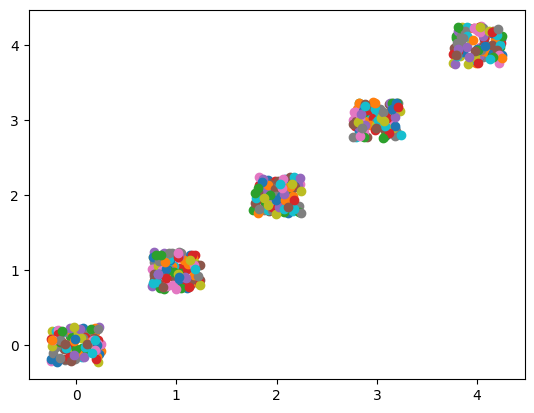

In [28]:
# let's create some data that is clustered around 5 centroids
data = []
for i in range(5):
    for j in range(100):
        data.append([i+random.random()/2-0.25, i+random.random()/2-0.25])

# let's plot this data
import matplotlib.pyplot as plt
for d in data:
    plt.scatter(d[0], d[1]) 
plt.show()

Old centroids: [[0.5014148239889722, 0.5106099435727877], [4.0236339210479, 3.86429644422692], [4.133036340705079, 4.129970676953546], [2.50435268442731, 2.507172302558107], [3.852524422102659, 4.109920693173669]]
New centroids: [[0.5014148239889722, 0.5106099435727877], [4.0236339210479, 3.86429644422692], [4.133036340705079, 4.129970676953546], [2.50435268442731, 2.507172302558107], [3.852524422102659, 4.109920693173669]]
Converged after 3 iterations, tolerance not met: 0.0001


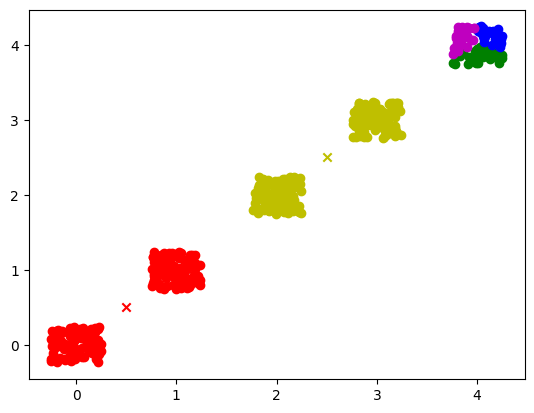

In [29]:
shuffled_data = data.copy()
random.shuffle(shuffled_data)
clusters, centroids = k_means(shuffled_data, k=5, seed=2026, max_iter=1000, tol=1e-4, debug=True)
colors = ['r', 'g', 'b', 'y', 'm']
for i in range(5):
    for d in clusters[i]:
        plt.scatter(d[0], d[1], color=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], color=colors[i], marker='x')
plt.show()

Converged after 10 iterations, tolerance not met: 0.0001


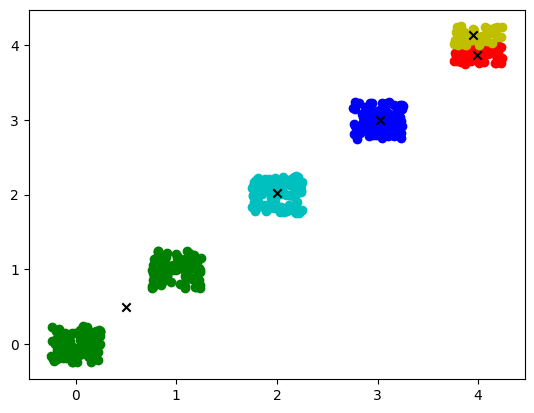

In [22]:
# now let use k-means to cluster this data
clusters, centroids = k_means(data, k=5)
# let's plot the clusters
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(5):
    for d in clusters[i]:
        plt.scatter(d[0], d[1], c=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')
plt.show()

Converged after 6 iterations, tolerance not met: 0.0001


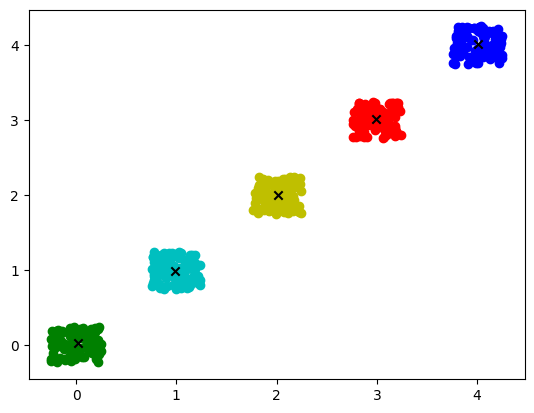

In [30]:
# let's try this with a seed
clusters, centroids = k_means(data, k=5, seed=2024)
# let's plot the clusters
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(5):
    for d in clusters[i]:
        plt.scatter(d[0], d[1], c=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')
plt.show()

Converged after 6 iterations, tolerance not met: 1e-09


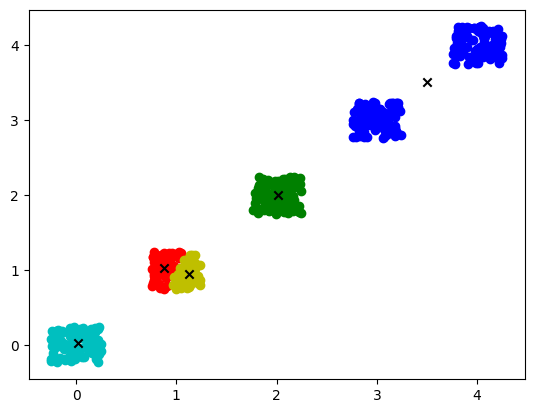

In [31]:
# let's decrease the tolerance to see if it converges faster
clusters, centroids = k_means(data, k=5, seed=1984, tol=1e-9)
# let's plot the clusters
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(5):
    for d in clusters[i]:
        plt.scatter(d[0], d[1], c=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')
plt.show()

### Issue with k-means clustering

The k-means algorithm is a popular method for clustering data into k groups. However, it has a few drawbacks. One of the main issues is that it assumes that the clusters are spherical. This means that it is not suitable for clusters that are not spherical in shape. Another issue is that it assumes that the clusters are of similar size. This means that it is not suitable for clusters that are of different sizes. The k-means algorithm also assumes that the clusters are of similar density. This means that it is not suitable for clusters that are of different densities.

Converged after 12 iterations, tolerance not met: 1e-09


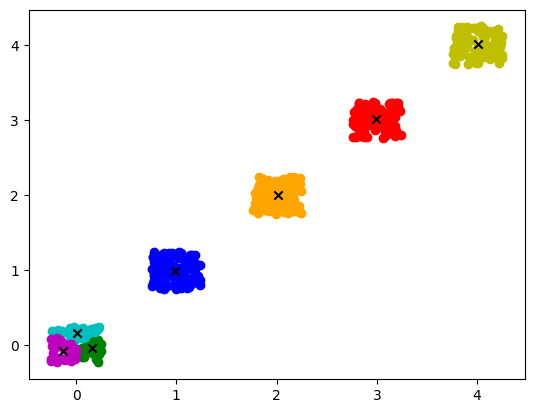

In [32]:
# so let's make 7 clusterings
K = 7
# let's decrease the tolerance to see if it converges faster
clusters, centroids = k_means(data, k=K, seed=2001, tol=1e-9)
# let's plot the clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange']
for i in range(K):
    for d in clusters[i]:
        plt.scatter(d[0], d[1], c=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')
plt.show()

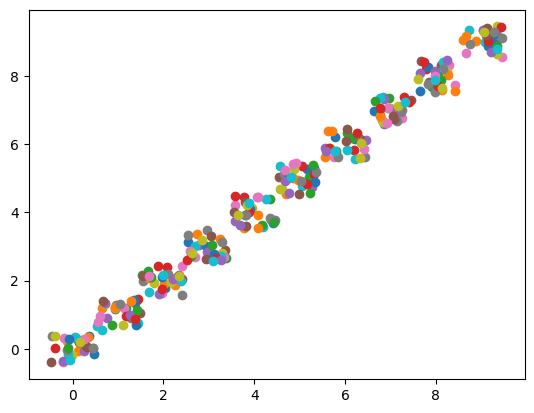

In [35]:
# let's generate some more random data
data = []
# we want to generate N clusters
N = 10
POINTS_PER_CLUSTER = 30
# we want to specify the dispersion radius of each cluster
dispersion = 0.95
for i in range(N):
    for j in range(POINTS_PER_CLUSTER):
        data.append([i+random.random()*dispersion-dispersion/2, i+random.random()*dispersion-dispersion/2])

# let's plot this data
for d in data:
    plt.scatter(d[0], d[1])
plt.show()

Old centroids: [[2.4897665433579, 2.4711858415750223], [4.461057840808221, 4.4977030228094685], [8.569601648855468, 8.532423383038266], [6.504215184522517, 6.491655813918205], [0.5413438681761443, 0.5707438761486798]]
New centroids: [[2.4897665433579, 2.4711858415750223], [4.461057840808221, 4.4977030228094685], [8.569601648855468, 8.532423383038266], [6.504215184522517, 6.491655813918205], [0.5413438681761443, 0.5707438761486798]]
Converged after 9 iterations, tolerance not met: 0.0001


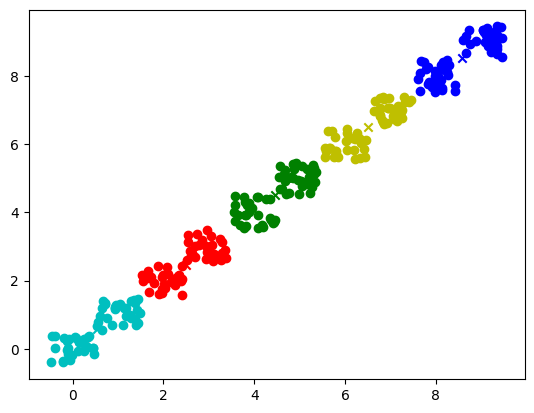

In [36]:
# so let's try K of 5 on this new data
K = 5
clusters, centroids = k_means(data, k=K, seed=2026, tol=1e-4, debug=True)
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(K):
    for d in clusters[i]:
        plt.scatter(d[0], d[1], color=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], color=colors[i], marker='x')
plt.show()

Old centroids: [[1.9923863172483693, 2.0104005634231275], [5.118745230522201, 5.1783826980460415], [8.017840737414641, 8.18416812213713], [7.841003698858221, 7.598311442805338], [0.4469658115916218, 0.48939726983535947], [3.534335389276078, 3.4975838882974846], [8.713036958965036, 9.02962518419262], [6.60353090357969, 6.5794213026282256], [9.200475320215615, 9.240851722655087], [9.298375742583099, 8.776606514759974]]
New centroids: [[1.9923863172483693, 2.0104005634231275], [5.118745230522201, 5.1783826980460415], [8.017840737414641, 8.18416812213713], [7.841003698858221, 7.598311442805338], [0.4469658115916218, 0.48939726983535947], [3.534335389276078, 3.4975838882974846], [8.713036958965036, 9.02962518419262], [6.60353090357969, 6.5794213026282256], [9.200475320215615, 9.240851722655087], [9.298375742583099, 8.776606514759974]]
Converged after 8 iterations, tolerance not met: 0.0001


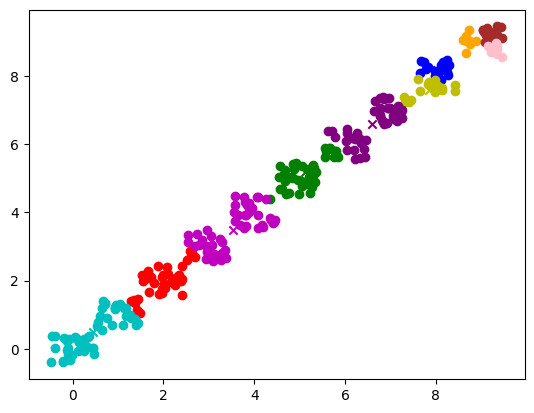

In [37]:
# let's try 10 again
K = 10
clusters, centroids = k_means(data, k=K, seed=2026, tol=1e-4, debug=True)
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'brown', 'pink']
for i in range(K):
    for d in clusters[i]:
        plt.scatter(d[0], d[1], color=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], color=colors[i], marker='x')
plt.show()

### Elbow method

We can use the elbow method to find the optimal number of clusters for k-means clustering. The elbow method is a heuristic used to determine the number of clusters in a data set. The idea is to run k-means clustering on the data set for a range of values of k (e.g., k from 1 to 10), and for each value of k, calculate the sum of squared errors (SSE). The SSE is the sum of the squared distances between each data point and the centroid of the cluster to which it belongs. Then, plot the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cd/DataClustering_ElbowCriterion.JPG" width="400">

Src: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

## Other Clustering Methods

There are many other clustering methods that can be used to cluster data. Some of the most popular clustering methods include hierarchical clustering, DBSCAN, and Gaussian mixture models. Each of these methods has its own strengths and weaknesses, and the best method to use will depend on the specific characteristics of the data set.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" width="700">

Src: https://scikit-learn.org/stable/modules/clustering.html

### 20.3.2 Learning Bayes Net Parameter Values for Hidden Variables**  
- **Overview:**  Learning parameter values in Bayesian networks that include hidden variables involves challenges due to the non-observability of some variables. These hidden or latent variables significantly influence the network but are not directly observed in the data. 
- **Application to Mixtures:**  The example provided involves candies from two mixed bags, each characterized by features like Flavor, Wrapper, and Hole, modeled with a naive Bayes structure. The bag from which a candy originates serves as a hidden variable influencing the observable features. 
- **Expectation-Maximization (EM) Algorithm in Bayes Nets:**  
- **Initial Step:**  Parameters are initialized, often arbitrarily, to start the EM process. 
- **E-step (Expectation):**  Calculate the expected counts of how data points relate to different components of the model (e.g., which bag a candy is likely from) based on current parameter estimates. 
- **M-step (Maximization):**  Update the model's parameters (e.g., the probabilities of different features given the bag) based on these expected counts, aiming to increase the likelihood of the observed data under the model. 
- **Iterative Improvement:**  Through iterations of E and M steps, the algorithm refines both the estimated parameters and the distribution of hidden variables, improving the model's fit to the data. 
- **Example Outcome:**  In the example, EM is used to estimate the probabilities associated with each candy's features given its bag of origin. The algorithm iteratively updates these probabilities, eventually arriving at estimates that closely match the true model parameters. 
- **Challenges and Solutions:**  
- **Identifiability Issues:**  A key challenge in learning with hidden variables is model identifiability. With insufficient observable data, it might not be possible to uniquely determine the parameters or structure of the underlying model. For instance, with fewer attributes, the model may not have enough information to recover all parameters accurately. 
- **Degeneracy and Convergence:**  The EM algorithm may converge to different solutions based on initial parameter settings, especially when the model includes symmetries or equivalences (e.g., flipping the labels of the bags). 
- **Practical Implications:**  The process demonstrates the power of the EM algorithm to infer hidden structures within data, enabling the estimation of complex model parameters even when direct observations are not available. This capability is particularly valuable in fields where the underlying states or processes are not directly observable, such as in genetics, economics, and various classification problems.

Learning Bayesian network parameters with hidden variables through EM highlights the importance of probabilistic reasoning and iterative optimization in uncovering latent structures from observed data, enhancing our understanding and modeling of complex systems.

### 20.3.3 Learning Hidden Markov Models**  
- **Problem Overview:**  In hidden Markov models (HMMs), the primary learning objective is to determine the transition probabilities between states based on sequences of observations. An HMM can be visualized as a dynamic Bayesian network with a single discrete state variable, where each data point represents an observed sequence. 
- **Learning Transition Probabilities:**  The core challenge in HMMs is estimating transition probabilities, θij, which represent the likelihood of moving from state i to state j. Unlike in standard Bayesian networks, where each parameter is unique and directly related to specific observations, HMM parameters must be learned from sequences where the exact state transitions are not directly observable. 
- **Expectation-Maximization (EM) Algorithm Application:**  The EM algorithm, particularly through its E-step and M-step, facilitates the estimation of these hidden parameters. The process involves calculating expected counts of transitions between states based on the current model, then updating the model to maximize the likelihood of the observed sequences. 
- **Estimation Method:**  To estimate a specific transition probability (θij), the algorithm computes the expected proportion of transitions from state i to state j across all observed sequences. This requires calculating expected counts, which are derived from the probabilities of being in state i and transitioning to state j, given the entire sequence of observations. 
- **Forward-Backward Algorithm:**  The forward-backward algorithm, adapted for HMM inference, plays a critical role in computing these probabilities. It's essential for determining both the probability distribution of a state at a given time considering past observations (filtering) and the distribution considering the entire sequence of observations (smoothing). 
- **Smoothing vs. Filtering:**  While filtering provides the probability distribution for the current state based on past data, smoothing gives a more comprehensive distribution that accounts for all available evidence, including future observations. Smoothing is crucial for accurately estimating the transition probabilities in an HMM since it considers the entire context of an observed sequence. 
- **Learning Outcomes:**  By iteratively applying the EM algorithm and leveraging the forward-backward algorithm for smoothing, it's possible to refine the transition probabilities in an HMM, thus improving the model's ability to predict or understand future state sequences based on observed data.

Learning hidden Markov models through the EM algorithm enables the effective analysis and understanding of sequential data, where the underlying state transitions are not directly observable. This approach is widely applicable in fields such as speech recognition, biological sequence analysis, and financial time series prediction, where the sequential nature of the data and the hidden states play a crucial role in the phenomena being studied.

### 20.3.4 The General Form of the EM Algorithm**  
- **Overview:**  The Expectation-Maximization (EM) algorithm is a powerful method for parameter estimation in probabilistic models with hidden variables. It iteratively improves parameter estimates by alternating between estimating the hidden variables given the current model parameters (E-step) and optimizing the model parameters given the estimated hidden variables (M-step). 
- **Formulation:**  
- **Variables:**  Let xxx represent all observed data across examples, ZZZ denote all hidden variables, and θ\thetaθ encompass all model parameters. 
- **Algorithm Essence:**  The essence of the EM algorithm is captured by the formula θ(i+1)=arg⁡max⁡θ∑zP(Z=z∣x,θ(i))\theta^{(i+1)} = \arg\max_{\theta} \sum_{z} P(Z=z|x,\theta^{(i)})θ(i+1)=argmaxθ​∑z​P(Z=z∣x,θ(i)), where θ(i+1)\theta^{(i+1)}θ(i+1) represents the updated parameters after the iii-th iteration. 
- **E-step:**  Calculate the expected log likelihood of the complete data (observed and hidden), based on the current parameter estimates. This involves computing the posterior distribution over hidden variables given the observed data and current model parameters. 
- **M-step:**  Update the model parameters to maximize the expected log likelihood found in the E-step. This step effectively treats the expected values of hidden variables as if they were directly observed. 
- **Application to Various Models:**  The EM algorithm's general framework makes it adaptable to a wide range of models, including mixtures of Gaussians, Bayesian networks, and hidden Markov models (HMMs). The key is to correctly identify the hidden variables specific to each model and apply the EM steps accordingly. 
- **Variants and Improvements:**  
- **Approximate E-step:**  In cases where the E-step is computationally infeasible due to the model's complexity, approximate methods like sampling (e.g., MCMC) or variational inference can be used to perform an effective E-step. 
- **Direct Parameter Updates:**  For methods involving sampling, each sampled state of hidden and observed variables can be used to update the model parameters, as if each sample were a complete observation. 
- **Use in Large Networks:**  Variational methods and loopy belief propagation have been successfully applied to learn parameters in extensive networks, demonstrating the EM algorithm's adaptability to different inference strategies.

The EM algorithm's strength lies in its flexibility and generality, enabling efficient parameter learning in models where direct observation of all variables is not possible. By cleverly inferring the hidden structure and iteratively refining model parameters, EM provides a robust framework for uncovering the underlying patterns in complex datasets.

### 20.3.5 Learning Bayes Net Structures with Hidden Variables**  
- **Introduction:**  Learning the structure of Bayesian networks in the presence of hidden variables introduces additional complexity compared to dealing with complete data. Hidden variables are those not directly observed in the data but influence observable variables, necessitating more sophisticated approaches for learning network structure. 
- **Expert-Specified Hidden Variables:**  In some scenarios, domain experts may indicate the existence of certain hidden variables, allowing learning algorithms to incorporate these into the model structure. The challenge remains in accurately positioning these variables within the network to reflect their true causal relationships with observed data. 
- **Learning Without Predefined Hidden Variables:**  
- **Model Simplification:**  To avoid creating overly complex models that mimic the complete-data scenario without hidden variables, algorithms can introduce new hidden variables during learning. This approach seeks to simplify the model and capture underlying structures in the data more effectively. 
- **Modification Choices:**  Algorithms may add, delete, or modify the attributes (arity) of hidden variables and adjust links within the network. This flexible strategy helps in discovering latent structures that better explain the observed data. 
- **Complexity and Model Evaluation:**  As with complete-data scenarios, applying a pure maximum-likelihood criterion without considering model complexity can lead to fully connected networks, underscoring the importance of complexity penalties. Methods like Markov Chain Monte Carlo (MCMC) sampling can approximate Bayesian learning, even for models with an uncertain number of components. 
- **Challenges with Parameter Learning:**  The presence of hidden variables necessitates the use of EM or gradient-based algorithms within the inner loop of structure learning, making the process computationally intensive. Calculating posteriors for parameter updates is NP-hard, limiting the feasibility of learning complex models through this approach. 
- **Structural EM Algorithm:**  An adaptation of the EM algorithm, structural EM allows for updates to both the network structure and parameters based on expected counts. Unlike traditional methods, which recompute expected counts for each structural variation, structural EM maintains these counts across potential structural changes. This method shows promise in efficiently learning nontrivial network structures by focusing the search space on structures rather than on both structures and parameters. 
- **Future Directions:**  Although structural EM offers an innovative approach to learning Bayesian network structures with hidden variables, significant challenges remain. Further research and development are needed to fully address the complexities of structure learning in these contexts, especially for models capturing intricate causal relationships among a large number of variables.

Learning Bayesian network structures in the presence of hidden variables is a critical area of research in machine learning. By developing methods to effectively incorporate hidden variables and manage model complexity, researchers aim to uncover deeper insights into the data, facilitating the discovery of underlying patterns and causal mechanisms.

## Summary of Statistical Learning Methods**  
- **Bayesian Learning:**  This approach treats learning as probabilistic inference, updating prior distributions over hypotheses based on observed data. It effectively implements Ockham's razor, balancing simplicity and fit, though it faces challenges with complex hypothesis spaces due to computational intractability. 
- **MAP Learning:**  Focuses on identifying the most likely hypothesis given the data, utilizing the hypothesis prior for selection. This method is more computationally feasible than full Bayesian learning and is widely applicable across various models. 
- **Maximum-Likelihood Learning:**  Chooses the hypothesis that maximizes the data's likelihood, functioning similarly to MAP learning with a uniform prior. This approach is particularly straightforward in scenarios like linear regression and Bayesian networks with fully observable variables, offering closed-form solutions in some cases. 
- **EM Algorithm for Hidden Variables:**  When dealing with hidden or latent variables, the expectation-maximization (EM) algorithm provides a way to find local maximum likelihood solutions. It has applications in unsupervised clustering, Bayesian network learning, and hidden Markov model learning. 
- **Bayesian Network Structure Learning:**  This involves model selection through discrete structure search, requiring a balance between model complexity and fit to data. Techniques include both parametric methods and the structural EM algorithm for more efficient learning. 
- **Nonparametric Models:**  These models use the data itself to represent the distribution, with the number of parameters scaling with the size of the training set. Techniques like nearest-neighbors and kernel methods are employed to make predictions based on data points' proximity and weighted combinations.

Statistical learning has made significant advances in both theory and application, enabling the learning of complex models given the feasibility of exact or approximate inference. This field continues to grow, pushing the boundaries of what can be learned from data across various domains, including computer science, biology, and the social sciences.

## Bibliographical and Historical Notes on Statistical Learning**  
- **Early Interest and Resurgence:** 
- 1973: Duda and Hart's work marks early interest in statistical learning.
- Late 1980s: Renewed focus on statistical methods with Bayesian networks.
- Late 1990s: Convergence of interests in machine learning, statistics, and neural networks. 
- **Notable Models and Methods:** 
- 1950s: Origins of the naive Bayes model, later analyzed for its success by Domingos and Pazzani in 1997.
- 1997: Boosted naive Bayes wins the first KDD Cup, highlighted by Elkan.
- Heckerman's 1998 work provides an introduction to Bayes net learning.
- 1993: Bayesian parameter learning with Dirichlet priors discussed by Spiegelhalter et al. 
- **Software Packages:** 
- BUGS, JAGS, and STAN are significant for statistical learning with Bayes net models. 
- **Learning Bayes Net Structures:** 
- 1988: Pearl's work on conditional independence tests.
- 1992: Cooper and Herskovits develop a likelihood-based structure learning approach.
- 2001: Bayes net learning method shines in the KDD Cup for a bioinformatics problem. 
- **Learning with Hidden Variables:** 
- 1958: Hartley introduces the general idea of EM.
- 1966: Baum and Petrie develop the Baum–Welch algorithm for HMM learning.
- 1977: Dempster, Laird, and Rubin present the EM algorithm in general form. 
- **Structural and Bayesian Learning:** 
- Late 1990s: Structural EM algorithm by Friedman introduces updates to network structure and parameters.
- Early 2000s: Bayesian structure learning explored by Friedman and Koller. 
- **Causality and Nonparametric Methods:** 
- 2000: Pearl's work challenges the notion that observational data can only yield correlational information, promoting the study of causality.
- 1956-1962: Rosenblatt and Parzen lay foundations for nonparametric density estimation. 
- **Key Texts and Conferences:** 
- DeGroot (1970), Berger (1985), and Gelman et al. (1995) on Bayesian statistics.
- Bishop (2007), Hastie et al. (2009), Barber (2012), and Murphy (2012) for introductions to statistical machine learning.
- NeurIPS and AI & Statistics conferences, along with Bayesian Analysis journal, as significant platforms for Bayesian learning research.

## More to Explore**

- **Books:**
- "Pattern Recognition and Machine Learning" by Christopher Bishop (2006).
https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf - presumably Microsoft's permission to distribute for non-commercial use.
- "The Elements of Statistical Learning" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman (2009).
<div>
<img src="https://m.media-amazon.com/images/I/81YHoGwzyvL._SY522_.jpg" width="200"></div>

- "Bayesian Data Analysis" by Andrew Gelman, John Carlin, Hal Stern, David Dunson, Aki Vehtari, and Donald Rubin (2013).
http://www.stat.columbia.edu/~gelman/book/BDA3.pdf - free for non-commercial use.

- **Courses:**
- "Probabilistic Graphical Models" by Daphne Koller, Stanford University (Coursera).